# Transfer Learning with TensorFlow Part 1: Feature Extraction

We've built a bunch of convolutional neural networks from scratch and they all seem to be learning, however, there is still plenty of room for improvement.

To improve our model(s), we could spend a while trying different configurations, adding more layers, changing the learning rate, adjusting the number of neurons per layer and more.

However, doing this is very time consuming.

Luckily, there's a technique we can use to save time.

It's called **transfer learning**, in other words, taking the patterns (also called weights) another model has learned from another problem and using them for our own problem.

There are two main benefits to using transfer learning:
1. Can leverage an existing neural network architecture proven to work on problems similar to our own.
2. Can leverage a working neural network architecture which has **already learned** patterns on similar data to our own. This often results in achieving great results with less custom data.

What this means is, instead of hand-crafting our own neural network architectures or building them from scratch, we can utilise models which have worked for others.

And instead of training our own models from scratch on our own datasets, we can take the patterns a model has learned from datasets such as [ImageNet](http://www.image-net.org/) (millions of images of different objects) and use them as the foundation of our own. Doing this often leads to getting great results with less data.

Over the next few notebooks, we'll see the power of transfer learning in action.

## What we're going to cover

We're going to go through the following with TensorFlow:

- Introduce transfer learning (a way to beat all of our old self-built models)
- Using a smaller dataset to experiment faster (10% of training samples of 10 classes of food)
- Build a transfer learning feature extraction model using TensorFlow Hub
- Introduce the TensorBoard callback to track model training results
- Compare model results using TensorBoard

## Using a GPU

To begin, let's check to see if we're using a GPU. Using a GPU will make sure our model trains faster than using just a CPU.

That would mean GPU isn't running:
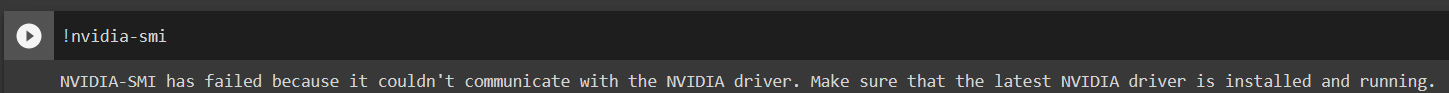

In that case Go to Runtime -> Change Runtime Type -> Hardware Accelerator and select "GPU", then rerun the cell above.

In [ ]:
!nvidia-smi

Wed Nov  9 12:23:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Transfer leanring with TensorFlow Hub: Getting great results with 10% of the data

If you've been thinking, "surely someone else has spent the time crafting the right model for the job..." then you're in luck. 

For many of the problems you'll want to use deep learning for, chances are, a working model already exists.

And the good news is, you can access many of them on TensorFlow Hub.

[TensorFlow Hub](https://tfhub.dev/) is a repository for existing model components. It makes it so you can import and use a fully trained model with as little as a URL.

# 1. Getting Data


In [ ]:
# Get data (10% of labels)
import zipfile

# Download data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-11-09 12:23:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.24.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  16.3MB/s    in 12s     

2022-11-09 12:23:56 (13.7 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



## Inspect the data

In [ ]:
# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random 

def view_random_image():
  option_type = ["train", "test"]
  option_class = ["hamburger", "pizza", "ice_cream", "ramen", "chicken_curry",
                  "steak", "chicken_wings", "sushi", "fried_rice", "grilled_salmon"]

  chose_type = random.choice(option_type)
  chose_class = random.choice(option_class)
  N_images = 250-1
  if chose_type == "train": N_images = 75-1
  chose_image_n = random.randint(0, N_images)

  path = "10_food_classes_10_percent/"+chose_type+"/"+chose_class
  images_file = os.listdir(path)
  random_image_file = images_file[chose_image_n]

  img = mpimg.imread(path + "/" + random_image_file)
  plt.imshow(img)
  plt.title(chose_class)
  plt.axis("off")
  plt.show()

  print(f"Image shape: {img.shape}") # show the shape of the image

  # return img

Image shape: (306, 512, 3)


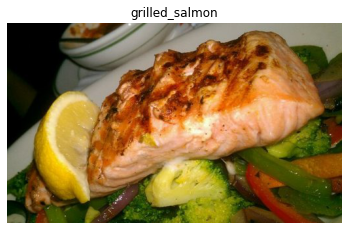

In [ ]:
view_random_image()

# 2. Creating Data Loaders

Now we've downloaded the data, let's use the [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) class along with the `flow_from_directory` method to load in our images.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE, # Makes all images the same shape
                                               batch_size=BATCH_SIZE,   # Divides images to batches
                                               class_mode="categorical")# Set the problem as categorical multiclass clasification

print("Testing images:")
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Training images:
Found 750 images belonging to 10 classes.
Testing images:
Found 2500 images belonging to 10 classes.


# 3. Setting up Callbacks

[Callbacks](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks) are extra functionality you can add to your models to be performed during or after training. Some of the most popular callbacks include:
* [**Experiment tracking with TensorBoard**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard) - log the performance of multiple models and then view and compare these models in a visual way on [TensorBoard](https://www.tensorflow.org/tensorboard) (a dashboard for inspecting neural network parameters). Helpful to compare the results of different models on your data.
* [**Model checkpointing**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) - save your model as it trains so you can stop training if needed and come back to continue off where you left. Helpful if training takes a long time and can't be done in one sitting.
* [**Early stopping**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) - leave your model training for an arbitrary amount of time and have it stop training automatically when it ceases to improve. Helpful when you've got a large dataset and don't know how long training will take.


The TensorBoard callback can be accessed using [`tf.keras.callbacks.TensorBoard()`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard). 

Its main functionality is saving a model's training performance metrics to a specified `log_dir`.

By default, logs are recorded every epoch using the `update_freq='epoch'` parameter. This is a good default since tracking model performance too often can slow down model training.

To track our modelling experiments using TensorBoard, let's create a function which creates a TensorBoard callback for us.

> 🔑 **Note:** We create a function for creating a TensorBoard callback because as we'll see later on, each model needs its own TensorBoard callback instance (so the function will create a new one each time it's run).



In [ ]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

# 4. Creating models with TensorFlow Hub

You might be wondering, how do you find these models on TensorFlow Hub?

Here are the steps I took:

1. Go to [tfhub.dev](https://tfhub.dev/).
2. Choose your problem domain, e.g. "Image" (we're using food images).
3. Select your TF version, which in our case is TF2.
4. Remove all "Problem domanin" filters except for the problem you're working on. 
  * **Note:** "Image feature vector" can be used alongside almost any problem, we'll get to this soon.
5. The models listed are all models which could potentially be used for your problem.

> 🤔 **Question:** *I see many options for image classification models, how do I know which is best?*

You can see a list of state of the art models on [paperswithcode.com](https://www.paperswithcode.com), a resource for collecting the latest in deep learning paper results which have code implementations for the findings they report.

Since we're working with images, our target are the [models which perform best on ImageNet](https://paperswithcode.com/sota/image-classification-on-imagenet).

6. Select the Architecture tab on TensorFlow Hub and you'll see a dropdown menu of architecture names appear. 
  * The rule of thumb here is generally, names with larger numbers means better performing models. For example, EfficientNetB4 performs better than EfficientNetB0.
    * However, the tradeoff with larger numbers can mean they take longer to compute. 
7. Select EfficientNetB0 and you should see [something like the following](https://tfhub.dev/s?module-type=image-classification,image-feature-vector&network-architecture=efficientnet-b0&tf-version=tf2):
8. Clicking the one titled "[efficientnet/b0/feature-vector](https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1)" brings us to a page with a button that says "Copy URL". That URL is what we can use to harness the power of EfficientNetB0.
  * Copying the URL should give you something like this: https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1

> **Why did we chose feature vector and not classification?**


1. **"As is" transfer learning** is when you take a pretrained model as it is and apply it to your task without any changes. 

  * For example, many computer vision models are pretrained on the ImageNet dataset which contains 1000 different classes of images. This means passing a single image to this model will produce 1000 different prediction probability values (1 for each class). 

    * This is helpful if you have 1000 classes of image you'd like to classify and they're all the same as the ImageNet classes, however, it's not helpful if you want to classify only a small subset of classes (such as 10 different kinds of food). Model's with `"/classification"` in their name on TensorFlow Hub provide this kind of functionality.

2. **Feature extraction transfer learning** is when you take the underlying patterns (also called weights) a pretrained model has learned and adjust its outputs to be more suited to your problem. 

  * For example, say the pretrained model you were using had 236 different layers (EfficientNetB0 has 236 layers), but the top layer outputs 1000 classes because it was pretrained on ImageNet. To adjust this to your own problem, you might remove the original activation layer and replace it with your own but with the right number of output classes. The important part here is that **only the top few layers become trainable, the rest remain frozen**. 

    * This way all the underlying patterns remain in the rest of the layers and you can utilise them for your own problem. This kind of transfer learning is very helpful when your data is similar to the data a model has been pretrained on.

3. **Fine-tuning transfer learning** is when you take the underlying patterns (also called weights) of a pretrained model and adjust (fine-tune) them to your own problem. 

    * This usually means training **some, many or all** of the layers in the pretrained model. This is useful when you've got a large dataset (e.g. 100+ images per class) where your data is slightly different to the data the original model was trained on.

A common workflow is to "freeze" all of the learned patterns in the bottom layers of a pretrained model so they're untrainable. And then train the top 2-3 layers of so the pretrained model can adjust its outputs to your custom data (**feature extraction**).

After you've trained the top 2-3 layers, you can then gradually "unfreeze" more and more layers and run the training process on your own data to further **fine-tune** the pretrained model.

> 🤔 **Question:** *Why train only the top 2-3 layers in feature extraction?*

The lower a layer is in a computer vision model as in, the closer it is to the input layer, the larger the features it learn. For example, a bottom layer in a computer vision model to identify images of cats or dogs might learn the outline of legs, where as, layers closer to the output might learn the shape of teeth. Often, you'll want the larger features (learned patterns are also called features) to remain, since these are similar for both animals, where as, the differences remain in the more fine-grained features.

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/04-different-kinds-of-transfer-learning.png)
*The different kinds of transfer learning. An original model, a feature extraction model (only top 2-3 layers change) and a fine-tuning model (many or all of original model get changed).*

Okay, enough talk, let's see this in action. Once we do, we'll explain what's happening.

First we'll import TensorFlow and TensorFlow Hub.

In [ ]:
efficient_net = "https://tfhub.dev/google/efficientnet/b0/feature-vector/1"
res_net = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
# Function that creates a needed model from URL
def create_model(model_url, N_classes):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.
  
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Transfer feature extractor
  feature_extraction = hub.KerasLayer(model_url,        # Specify the model
                                      trainable=False,  # Freeze trained patterns
                                      input_shape=IMAGE_SHAPE+(3,), # Set correct input shape
                                      name="Feature_Extractor")
  # Create a model
  model = tf.keras.Sequential([
    feature_extraction,
    layers.Dense(N_classes, activation="softmax")
  ])

  return model

## ResNet model Train and Test

In [ ]:
# Create model
resnet_model = create_model(model_url=res_net, N_classes=10)

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
# Fit the model
resnet_history = resnet_model.fit(train_data_10_percent,
                                  epochs=10,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                         experiment_name="resnet50v2")])

Saving TensorBoard log files to: tensorflow_hub/resnet50v2/20221109-122416
Epoch 1/10
24/24 [==============================] - 37s 1s/step - loss: 1.9868 - accuracy: 0.3253 - val_loss: 1.2084 - val_accuracy: 0.6196
Epoch 2/10
24/24 [==============================] - 17s 717ms/step - loss: 0.9205 - accuracy: 0.7227 - val_loss: 0.8469 - val_accuracy: 0.7412
Epoch 3/10
24/24 [==============================] - 19s 823ms/step - loss: 0.6285 - accuracy: 0.8213 - val_loss: 0.7595 - val_accuracy: 0.7564
Epoch 4/10
24/24 [==============================] - 20s 866ms/step - loss: 0.4713 - accuracy: 0.8840 - val_loss: 0.7035 - val_accuracy: 0.7732
Epoch 5/10
24/24 [==============================] - 20s 843ms/step - loss: 0.3716 - accuracy: 0.9187 - val_loss: 0.6898 - val_accuracy: 0.7700
Epoch 6/10
24/24 [==============================] - 18s 780ms/step - loss: 0.3194 - accuracy: 0.9360 - val_loss: 0.6508 - val_accuracy: 0.7884
Epoch 7/10
24/24 [==============================] - 17s 718ms/step - l

**The best result from custom models was: 37% validation accuracy. Transfer Learning with ResNet-50 showed 80% accuracy on validation set!**

Also, it took only 18s per epoch, while custom network required almost 110 seconds

So, by suing Transfer Learning I:

1.   Increased speed, making network **x6.1** times faster
2.   Improved accuracy by **43%**, from 37% to 80%

Let's look at training curves



In [ ]:
# Plot validation and training curves separately
def plot_loss_curves(my_history):
  """
  Plots separate figures for training and validation metrics
  It is a helper function
  """
  loss = my_history.history["loss"]
  accuracy = my_history.history["accuracy"]
  val_loss = my_history.history["val_loss"]
  val_accuracy = my_history.history["val_accuracy"]

  epochs = range(len(loss))  # Length of any training metric gives the number of epochs

  # Plot Loss
  plt.figure(figsize=(20,7))
  plt.subplot(1,2,1)
  plt.plot(epochs, loss,     label = "Training Loss"  )
  plt.plot(epochs, val_loss, label = "Validation Loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot Accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy,     label = "Training Accuracy"  )
  plt.plot(epochs, val_accuracy, label = "Validation Accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

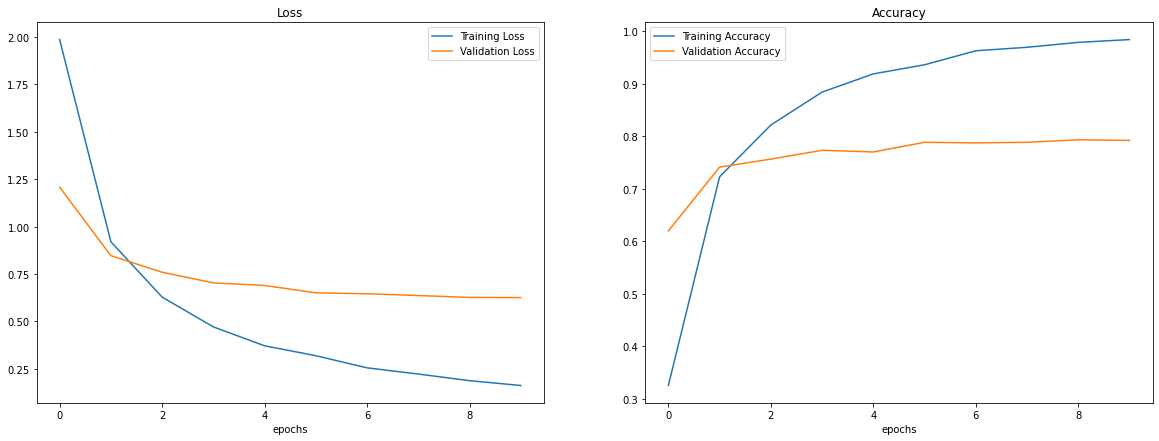

In [ ]:
plot_loss_curves(resnet_history)

Summary of the model

In [ ]:
# Resnet summary 
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Feature_Extractor (KerasLay  (None, 2048)             23564800  
 er)                                                             
                                                                 
 dense (Dense)               (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


You can see the power of TensorFlow Hub here. The feature extraction layer has 23,564,800 parameters which are prelearned patterns the model has already learned on the ImageNet dataset. Since we set `trainable=False`, these patterns remain frozen (non-trainable) during training.

This means during training the model updates the 20,490 parameters in the output layer to suit our dataset.

## EfficientNet model Train and Test

In [ ]:
# Create model
efficientnet_model = create_model(model_url=efficient_net, # use EfficientNetB0 TensorFlow Hub URL
                                  N_classes=10)

# Compile EfficientNet model
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit EfficientNet model 
efficientnet_history = efficientnet_model.fit(train_data_10_percent, # only use 10% of training data
                                              epochs=10, # train for 10 epochs
                                              steps_per_epoch=len(train_data_10_percent),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                                     # Track logs under different experiment name
                                                                                     experiment_name="efficientnetB0")])

Saving TensorBoard log files to: tensorflow_hub/efficientnetB0/20221109-122850
Epoch 1/10
24/24 [==============================] - 22s 780ms/step - loss: 1.8551 - accuracy: 0.4307 - val_loss: 1.3059 - val_accuracy: 0.7224
Epoch 2/10
24/24 [==============================] - 17s 710ms/step - loss: 1.0531 - accuracy: 0.7720 - val_loss: 0.8763 - val_accuracy: 0.8100
Epoch 3/10
24/24 [==============================] - 17s 724ms/step - loss: 0.7558 - accuracy: 0.8413 - val_loss: 0.7004 - val_accuracy: 0.8412
Epoch 4/10
24/24 [==============================] - 16s 705ms/step - loss: 0.6023 - accuracy: 0.8693 - val_loss: 0.6120 - val_accuracy: 0.8528
Epoch 5/10
24/24 [==============================] - 16s 671ms/step - loss: 0.5115 - accuracy: 0.8813 - val_loss: 0.5610 - val_accuracy: 0.8580
Epoch 6/10
24/24 [==============================] - 16s 670ms/step - loss: 0.4440 - accuracy: 0.9067 - val_loss: 0.5205 - val_accuracy: 0.8660
Epoch 7/10
24/24 [==============================] - 16s 698ms/s

**Efficient Net achieves even better results of 85% accuracy on validation set!**

It shows the importance to use the state-of-the-art model for a given domain

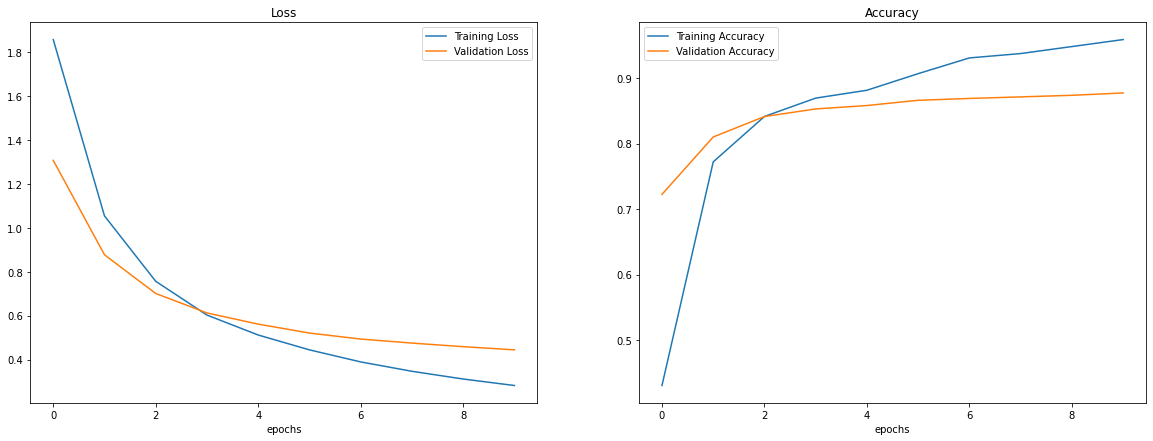

In [ ]:
plot_loss_curves(efficientnet_history)

In [ ]:
efficientnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Feature_Extractor (KerasLay  (None, 1280)             4049564   
 er)                                                             
                                                                 
 dense_1 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


It seems despite having over four times less parameters (4,049,564 vs. 23,564,800) than the ResNet50V2 extraction layer, the  EfficientNetB0 feature extraction layer yields better performance. Now it's clear where the "efficient" name came from.

> Generally, Transfer Learning model *Efficient Net* achieved **87% accuracy** and *ResNet-50* **achieved 85%**. While Efficient Net used **x5.7** times less parameters than ResNet. Both Transfer Learning models required around **x6.1** times less time for computation in comparison to the best custom model created in previous notebook. The results prooves the strength of Transfer Learning and also demonstrates importance of picking the best trained model in the domain for highes performance.

# 5. Comparing models using TensorBoard

The good thing is, since we set up a TensorBoard callback, all of our model's training logs have been saved automatically. To visualize them, we can upload the results to [TensorBoard.dev](https://tensorboard.dev/).

Uploading your results to TensorBoard.dev enables you to track and share multiple different modelling experiments. So if you needed to show someone your results, you could send them a link to your TensorBoard.dev as well as the accompanying Colab notebook.

> 🔑 **Note:** These experiments are public, do not upload sensitive data. You can delete experiments if needed.

### Uploading experiments to TensorBoard

To upload a series of TensorFlow logs to TensorBoard, we can use the following command:

```
Upload TensorBoard dev records

!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "EfficientNetB0 vs. ResNet50V2" \ 
  --description "Comparing two different TF Hub feature extraction models architectures using 10% of training images" \ 
  --one_shot
```

Where:
* `--logdir` is the target upload directory
* `--name` is the name of the experiment
* `--description` is a brief description of the experiment
* `--one_shot` exits the TensorBoard uploader once uploading is finished

In [ ]:
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "EfficientNetB0 vs. ResNet50V2" \
  --description "Comparing two different TF Hub feature extraction models architectures using 10% of training images" \
  --one_shoty
  


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorflow_hub/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=m468VDO3xi9m0oF2jFrYQXe33kICfO&prompt=consent&access_type=off

View your TensorBoard at https://tensorboard.dev/experiment/PQvLayS4TXehynfooSx1sA/

In [ ]:
# Check out experiments
!tensorboard dev list

https://tensorboard.dev/experiment/PQvLayS4TXehynfooSx1sA/
	Name                 EfficientNetB0 vs. ResNet50V2
	Description          Comparing two different TF Hub feature extraction models architectures using 10% of training images
	Id                   PQvLayS4TXehynfooSx1sA
	Created              2022-11-09 12:43:10 (4 minutes ago)
	Updated              2022-11-09 12:43:15 (4 minutes ago)
	Runs                 4
	Tags                 5
	Scalars              120
	Tensor bytes         0
	Binary object bytes  3122496
Total: 1 experiment(s)


Some useful commands for TensorBoard

### Delete an experiment
`!tensorboard dev delete --experiment_id n6kd8XZ3Rdy1jSgSLH5WjA`

### Check to see if experiments still exist
`!tensorboard dev list`

### Check out experiments
`!tensorboard dev list`


# OWN Project: Binary classification

For my own project I collected several photos of a phone and headphones. I want to achieve high accuracy on validation set (let's say more than 75% as it is a binary classification)

Let's start with the data

# 0. Make sure I use GPU

In [ ]:
!nvidia-smi

Thu Nov 10 08:21:05 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 1. Getting Data

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!ls

gdrive	sample_data


In [ ]:
path = "./gdrive/MyDrive/Colab Notebooks/Udemy: TensorFlow/05. Transfer Learning"
dataset_name = "phone_headphone"

In [ ]:
%cd ./gdrive/MyDrive/Colab Notebooks/Udemy: TensorFlow/05. Transfer Learning

/content/gdrive/MyDrive/Colab Notebooks/Udemy: TensorFlow/05. Transfer Learning


In [ ]:
!ls

'05 Transfer Learning Notebook.ipynb'
'Copy of 04_transfer_learning_in_tensorflow_part_1_feature_extraction.ipynb'
 my_project_tensorflow_hub
 phone_headphone
'Photos to Predict'


## 1.1 View Data

In [ ]:
# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk(dataset_name):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'phone_headphone'.
There are 2 directories and 0 images in 'phone_headphone/train'.
There are 0 directories and 17 images in 'phone_headphone/train/headphone'.
There are 0 directories and 17 images in 'phone_headphone/train/phone'.
There are 0 directories and 1 images in 'phone_headphone/uncertainty'.
There are 2 directories and 0 images in 'phone_headphone/test'.
There are 0 directories and 4 images in 'phone_headphone/test/phone'.
There are 0 directories and 4 images in 'phone_headphone/test/headphone'.


So, we have 17 training images of phones and headphones

Then we have 4 testing images for both classes

Also we have one confusing image with both phone and headphone

In [ ]:
# Instect data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random 

def view_random_image(dataset_path):
  option_type = ["train", "test"]
  option_class = ["phone", "headphone"]

  chose_type = random.choice(option_type)
  chose_class = random.choice(option_class)
  N_images = 17-1
  if chose_type == "test": N_images = 4-1
  chose_image_n = random.randint(0, N_images)

  print(chose_type, chose_class, chose_image_n)

  path = dataset_path+"/"+chose_type+"/"+chose_class
  images_file = os.listdir(path)
  random_image_file = images_file[chose_image_n]

  img = mpimg.imread(path + "/" + random_image_file)
  plt.imshow(img)
  plt.title(chose_type + " " + chose_class + " #" + str(chose_image_n+1))
  plt.axis("off")
  plt.show

  print(f"Image shape: {img.shape}") # show the shape of the image

  # return img

test headphone 0
Image shape: (1280, 960, 3)


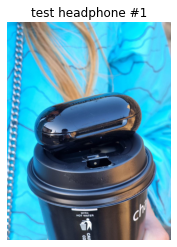

In [ ]:
view_random_image(dataset_name)

train phone 5
Image shape: (1280, 960, 3)


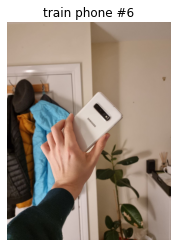

In [ ]:
view_random_image(dataset_name)

# 2. Creating Data Loaders

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 4

train_dir = dataset_name+"/train/"
test_dir = dataset_name+"/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE, # Makes all images the same shape
                                               batch_size=BATCH_SIZE,   # Divides images to batches
                                               class_mode="binary")# Set the problem as categorical multiclass clasification

print("Testing images:")
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="binary")

Training images:
Found 34 images belonging to 2 classes.
Testing images:
Found 8 images belonging to 2 classes.


# 3. Setting up Callbacks

In [ ]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

# 4. Creating models with TensorFlow Hub

In [ ]:
resbet_101_url = "https://tfhub.dev/google/imagenet/resnet_v1_101/feature_vector/5"
mobile_v3_url = "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5"
efficient_net_3_url = "https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1"
efficient_net_7_url = "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1"

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

# Function that creates a needed model from URL
def create_binary_model(model_url):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.
  
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Transfer feature extractor
  feature_extraction = hub.KerasLayer(model_url,        # Specify the model
                                      trainable=False,  # Freeze trained patterns
                                      input_shape=IMAGE_SHAPE+(3,), # Set correct input shape
                                      name="Feature_Extractor")
  # Create a model
  model = tf.keras.Sequential([
    feature_extraction,
    layers.Dense(1, activation="sigmoid")
  ])

  return model

In [ ]:
# Plot validation and training curves separately
def plot_loss_curves(my_history):
  """
  Plots separate figures for training and validation metrics
  It is a helper function
  """
  loss = my_history.history["loss"]
  accuracy = my_history.history["accuracy"]
  val_loss = my_history.history["val_loss"]
  val_accuracy = my_history.history["val_accuracy"]

  epochs = range(len(loss))  # Length of any training metric gives the number of epochs

  # Plot Loss
  plt.figure(figsize=(20,7))
  plt.subplot(1,2,1)
  plt.plot(epochs, loss,     label = "Training Loss"  )
  plt.plot(epochs, val_loss, label = "Validation Loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot Accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy,     label = "Training Accuracy"  )
  plt.plot(epochs, val_accuracy, label = "Validation Accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

## Model \#1 ResNet-101

In [ ]:
# Create model
resnet_model = create_binary_model(model_url=resbet_101_url)

# Compile
resnet_model.compile(loss='binary_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

# Fit the model
resnet_history = resnet_model.fit(train_data,
                                  epochs=10,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  callbacks=[create_tensorboard_callback(dir_name="my_project_tensorflow_hub",
                                                                         experiment_name="resnet100")])

Saving TensorBoard log files to: my_project_tensorflow_hub/resnet100/20221109-232822
Epoch 1/10
9/9 [==============================] - 27s 1s/step - loss: 0.6101 - accuracy: 0.7059 - val_loss: 0.7345 - val_accuracy: 0.6250
Epoch 2/10
9/9 [==============================] - 1s 149ms/step - loss: 0.1843 - accuracy: 0.9412 - val_loss: 0.3989 - val_accuracy: 0.8750
Epoch 3/10
9/9 [==============================] - 1s 148ms/step - loss: 0.0492 - accuracy: 1.0000 - val_loss: 0.4698 - val_accuracy: 0.6250
Epoch 4/10
9/9 [==============================] - 1s 159ms/step - loss: 0.0237 - accuracy: 1.0000 - val_loss: 0.4791 - val_accuracy: 0.6250
Epoch 5/10
9/9 [==============================] - 1s 155ms/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.4292 - val_accuracy: 0.6250
Epoch 6/10
9/9 [==============================] - 1s 149ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.3756 - val_accuracy: 0.6250
Epoch 7/10
9/9 [==============================] - 1s 150ms/step - loss: 0.009

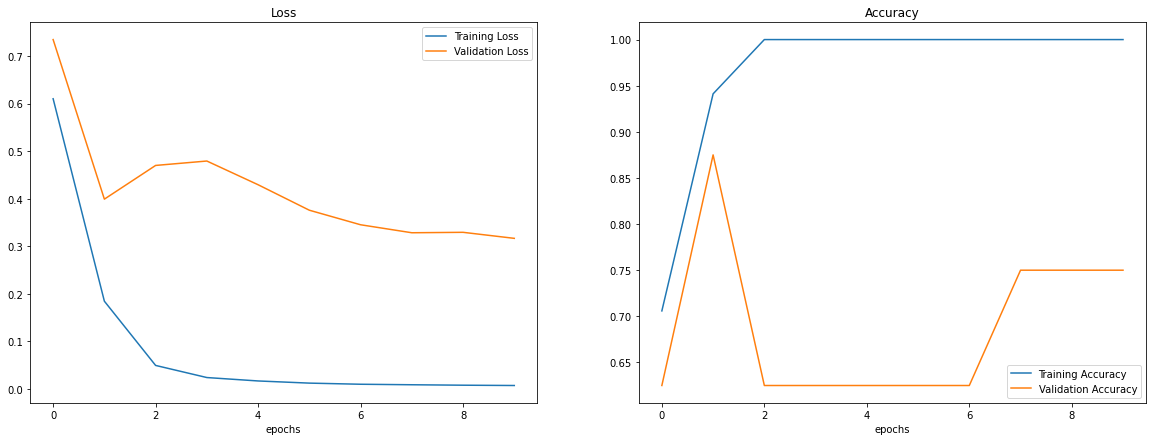

In [ ]:
# Resnet learning curves
plot_loss_curves(resnet_history)

In [ ]:
# Resnet summary 
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Feature_Extractor (KerasLay  (None, 2048)             42605504  
 er)                                                             
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 42,607,553
Trainable params: 2,049
Non-trainable params: 42,605,504
_________________________________________________________________


## Model \#2 Mobile v3

In [ ]:
# Create model
mobile_model = create_binary_model(model_url=mobile_v3_url)

# Compile
mobile_model.compile(loss='binary_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

# Fit the model
mobile_history = mobile_model.fit(train_data,
                                  epochs=10,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  callbacks=[create_tensorboard_callback(dir_name="my_project_tensorflow_hub",
                                                                         experiment_name="mobile_v3")])

Saving TensorBoard log files to: my_project_tensorflow_hub/mobile_v3/20221109-233043
Epoch 1/10
9/9 [==============================] - 6s 212ms/step - loss: 0.7125 - accuracy: 0.4706 - val_loss: 0.7967 - val_accuracy: 0.5000
Epoch 2/10
9/9 [==============================] - 1s 134ms/step - loss: 0.4668 - accuracy: 0.8529 - val_loss: 0.6935 - val_accuracy: 0.6250
Epoch 3/10
9/9 [==============================] - 1s 141ms/step - loss: 0.3303 - accuracy: 0.9412 - val_loss: 0.6115 - val_accuracy: 0.6250
Epoch 4/10
9/9 [==============================] - 1s 142ms/step - loss: 0.2366 - accuracy: 1.0000 - val_loss: 0.5496 - val_accuracy: 0.7500
Epoch 5/10
9/9 [==============================] - 1s 135ms/step - loss: 0.1838 - accuracy: 1.0000 - val_loss: 0.4993 - val_accuracy: 0.7500
Epoch 6/10
9/9 [==============================] - 1s 135ms/step - loss: 0.1449 - accuracy: 1.0000 - val_loss: 0.4635 - val_accuracy: 0.7500
Epoch 7/10
9/9 [==============================] - 1s 145ms/step - loss: 0.1

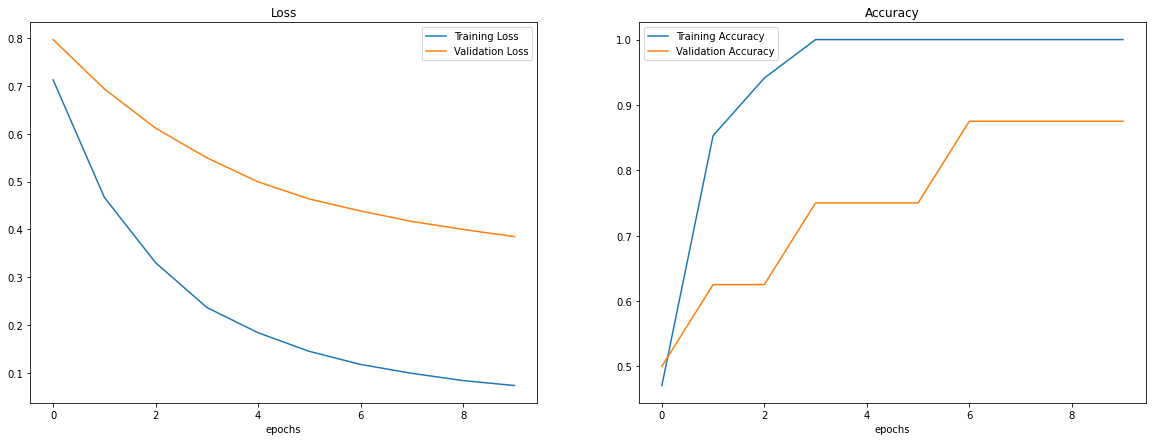

In [ ]:
# Mobile learning curves
plot_loss_curves(mobile_history)

In [ ]:
# Mobile summary 
mobile_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Feature_Extractor (KerasLay  (None, 1024)             1529968   
 er)                                                             
                                                                 
 dense_1 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 1,530,993
Trainable params: 1,025
Non-trainable params: 1,529,968
_________________________________________________________________


## Model \#3 Efficient Net B3

In [ ]:
# Create model
efficient_net_b3_model = create_binary_model(model_url=efficient_net_3_url)

# Compile
efficient_net_b3_model.compile(loss='binary_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

# Fit the model
efficient_net_b3_history = efficient_net_b3_model.fit(train_data,
                                  epochs=10,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  callbacks=[create_tensorboard_callback(dir_name="my_project_tensorflow_hub",
                                                                         experiment_name="efficient_net_b3")])

Saving TensorBoard log files to: my_project_tensorflow_hub/efficient_net_b3/20221110-082352
Epoch 1/10
9/9 [==============================] - 38s 2s/step - loss: 0.5901 - accuracy: 0.6765 - val_loss: 0.5152 - val_accuracy: 0.8750
Epoch 2/10
9/9 [==============================] - 1s 150ms/step - loss: 0.3329 - accuracy: 1.0000 - val_loss: 0.3767 - val_accuracy: 1.0000
Epoch 3/10
9/9 [==============================] - 1s 151ms/step - loss: 0.2064 - accuracy: 1.0000 - val_loss: 0.2946 - val_accuracy: 1.0000
Epoch 4/10
9/9 [==============================] - 1s 159ms/step - loss: 0.1409 - accuracy: 1.0000 - val_loss: 0.2457 - val_accuracy: 1.0000
Epoch 5/10
9/9 [==============================] - 1s 160ms/step - loss: 0.1028 - accuracy: 1.0000 - val_loss: 0.2139 - val_accuracy: 1.0000
Epoch 6/10
9/9 [==============================] - 1s 152ms/step - loss: 0.0809 - accuracy: 1.0000 - val_loss: 0.1925 - val_accuracy: 1.0000
Epoch 7/10
9/9 [==============================] - 1s 151ms/step - loss

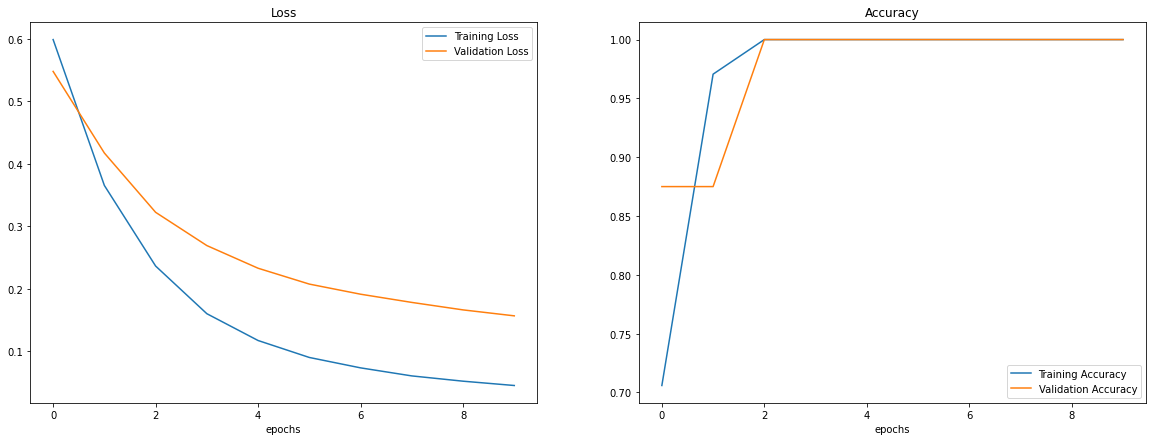

In [ ]:
# Efficient Net learning curves
plot_loss_curves(efficient_net_b3_history)

In [ ]:
# Mobile summary 
efficient_net_b3_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Feature_Extractor (KerasLay  (None, 1536)             10783528  
 er)                                                             
                                                                 
 dense_2 (Dense)             (None, 1)                 1537      
                                                                 
Total params: 10,785,065
Trainable params: 1,537
Non-trainable params: 10,783,528
_________________________________________________________________


## Model \#4 Efficient Net B7

In [ ]:
# Create model
efficient_net_b7_model = create_binary_model(model_url=efficient_net_7_url)

# Compile
efficient_net_b7_model.compile(loss='binary_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

# Fit the model
efficient_net_b7_history = efficient_net_b7_model.fit(train_data,
                                  epochs=10,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  callbacks=[create_tensorboard_callback(dir_name="my_project_tensorflow_hub",
                                                                         experiment_name="efficient_net_b7")])

Saving TensorBoard log files to: my_project_tensorflow_hub/efficient_net_b7/20221109-233310
Epoch 1/10
9/9 [==============================] - 34s 593ms/step - loss: 0.5758 - accuracy: 0.7647 - val_loss: 0.4880 - val_accuracy: 0.8750
Epoch 2/10
9/9 [==============================] - 1s 153ms/step - loss: 0.3276 - accuracy: 1.0000 - val_loss: 0.3853 - val_accuracy: 1.0000
Epoch 3/10
9/9 [==============================] - 1s 146ms/step - loss: 0.2093 - accuracy: 1.0000 - val_loss: 0.3210 - val_accuracy: 1.0000
Epoch 4/10
9/9 [==============================] - 1s 151ms/step - loss: 0.1419 - accuracy: 1.0000 - val_loss: 0.2786 - val_accuracy: 1.0000
Epoch 5/10
9/9 [==============================] - 1s 149ms/step - loss: 0.1043 - accuracy: 1.0000 - val_loss: 0.2524 - val_accuracy: 1.0000
Epoch 6/10
9/9 [==============================] - 1s 148ms/step - loss: 0.0801 - accuracy: 1.0000 - val_loss: 0.2323 - val_accuracy: 1.0000
Epoch 7/10
9/9 [==============================] - 1s 158ms/step - l

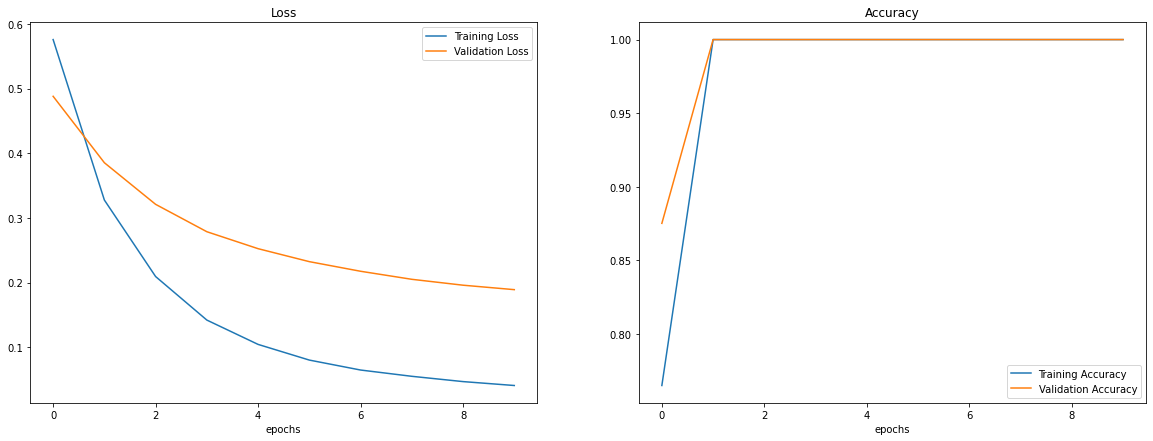

In [ ]:
# Efficient Net learning curves
plot_loss_curves(efficient_net_b7_history)

In [ ]:
# Mobile summary 
efficient_net_b7_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Feature_Extractor (KerasLay  (None, 2560)             64097680  
 er)                                                             
                                                                 
 dense_3 (Dense)             (None, 1)                 2561      
                                                                 
Total params: 64,100,241
Trainable params: 2,561
Non-trainable params: 64,097,680
_________________________________________________________________


# 5. Compare results in TensorBoard

In [ ]:
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./my_project_tensorflow_hub/ \
  --name "Own Project: Phones vs Headphones" \
  --description "Comparing four different TF Hub feature extraction models architectures on 17 images for binary classification" \
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./my_project_tensorflow_hub/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=5jJFEWw63uCEVwBde0lnNszebkn0vF&prompt=consent&acce

Efficient Net B3 is an oprimal choice depending on Parameters Number and best Accuracy.

It achieves 100% validation accuracy on Epoch #3 and uses only 10M params

# 6. Trying a model on real data

In [ ]:
%ls

'05 Transfer Learning Notebook.ipynb'
'Copy of 04_transfer_learning_in_tensorflow_part_1_feature_extraction.ipynb'
 my_project_tensorflow_hub/
 phone_headphone/
'Photos to Predict'/


In [ ]:
path_predict_data = "Photos to Predict"

for dirpath, dirnames, filenames in os.walk(path_predict_data):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'Photos to Predict'.
There are 0 directories and 4 images in 'Photos to Predict/phone'.
There are 0 directories and 5 images in 'Photos to Predict/headphones'.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 1

predict_dir = path_predict_data
predict_datagen = ImageDataGenerator(rescale=1/255.)

print("Predicting images:")
predict_data = predict_datagen.flow_from_directory(predict_dir,
                                                   classes=["phone", "headphones"],
                                               target_size=IMAGE_SHAPE, # Makes all images the same shape
                                               batch_size=BATCH_SIZE,   # Divides images to batches
                                               class_mode="binary")# Set the problem as categorical multiclass clasification

Predicting images:
Found 9 images belonging to 2 classes.


This data set consist of 5 headphones photo, and 3 phone photos. One of phone's photo has high unvertainty as both objects are shown there.

## View the data

In [ ]:
predict_data

In [ ]:
predict_data.filepaths

['Photos to Predict/phone/photo_1_2022-11-09_22-21-20.jpg',
 'Photos to Predict/phone/photo_20_2022-11-09_22-21-11.jpg',
 'Photos to Predict/phone/photo_20_2022-11-09_22-21-20.jpg',
 'Photos to Predict/phone/photo_9_2022-11-09_22-21-11.jpg',
 'Photos to Predict/headphones/photo_1_2022-11-09_23-40-44.jpg',
 'Photos to Predict/headphones/photo_2_2022-11-09_23-40-44.jpg',
 'Photos to Predict/headphones/photo_3_2022-11-09_23-40-44.jpg',
 'Photos to Predict/headphones/photo_4_2022-11-09_23-40-44.jpg',
 'Photos to Predict/headphones/photo_5_2022-11-09_23-40-44.jpg']

In [ ]:
predict_data.labels

array([0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

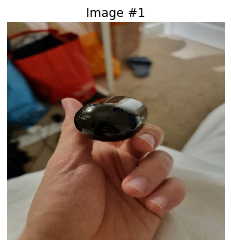

In [ ]:
index = 1 # Index from 0 to 7
plt.imshow(predict_data.__getitem__(index)[0][0])
plt.title("Image #" + str(index))
plt.axis("off")
plt.show()

In [ ]:
efficient_net_b3_model.predict(predict_data.__getitem__(index)[0])

1/1 [==============================] - 2s 2s/step


array([[0.00306167]], dtype=float32)

In [ ]:
predicted_labels = []
for i in range(predict_data.__len__()):
  image = predict_data.__getitem__(i)[0]
  prediction = efficient_net_b3_model.predict(image)
  if prediction > 0.5:
    predicted_labels.append(f"Phone {100*prediction[0][0]:.2f}%",)
  else:
    predicted_labels.append(f"Headphone {100*(1-prediction[0][0]):.2f}%",)
predicted_labels

1/1 [==============================] - 0s 31ms/step


['Phone 94.95%',
 'Headphone 99.69%',
 'Phone 86.51%',
 'Headphone 92.67%',
 'Headphone 98.99%',
 'Headphone 98.68%',
 'Headphone 87.72%',
 'Phone 93.37%',
 'Phone 85.03%']

## View predicted results

In [ ]:
def plot_predicted_pic(img, label, ax):
  ax.imshow(img)
  ax.axis("off")
  ax.set_title(label)

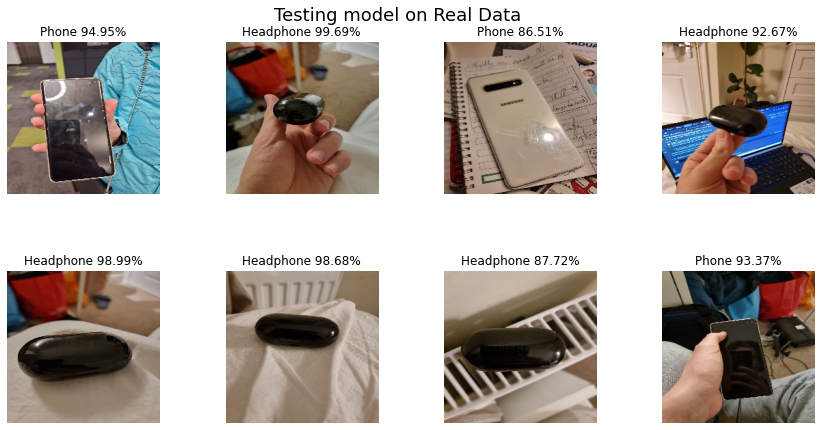

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Testing model on Real Data", fontsize=18, y=0.95)
for i in range(predict_data.__len__()-1):
  ax = plt.subplot(2,4,i+1)
  image = predict_data.__getitem__(i)[0][0]
  plot_predicted_pic(img=image, label=predicted_labels[i], ax=ax)
plt.show()